**Gurleen Kaur - 102003138**

**Ishit Choudhary - 102003133**


### Importing Libraries and Uploading Document

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

In [ ]:
# Uploading the dataset
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['Absenteeism.csv']))

Saving Absenteeism.csv to Absenteeism.csv


In [ ]:
# Checking the dataset
df2.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [ ]:
# Checking information about all attributes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    int64  
 1   Month of absence                 740 non-null    int64  
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Service time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work load Average/day            740 non-null    float64
 9   Hit target                       740 non-null    int64  
 10  Disciplinary failure             740 non-null    int64  
 11  Education                        740 non-null    int64  
 12  Son                   

#Preprocessing

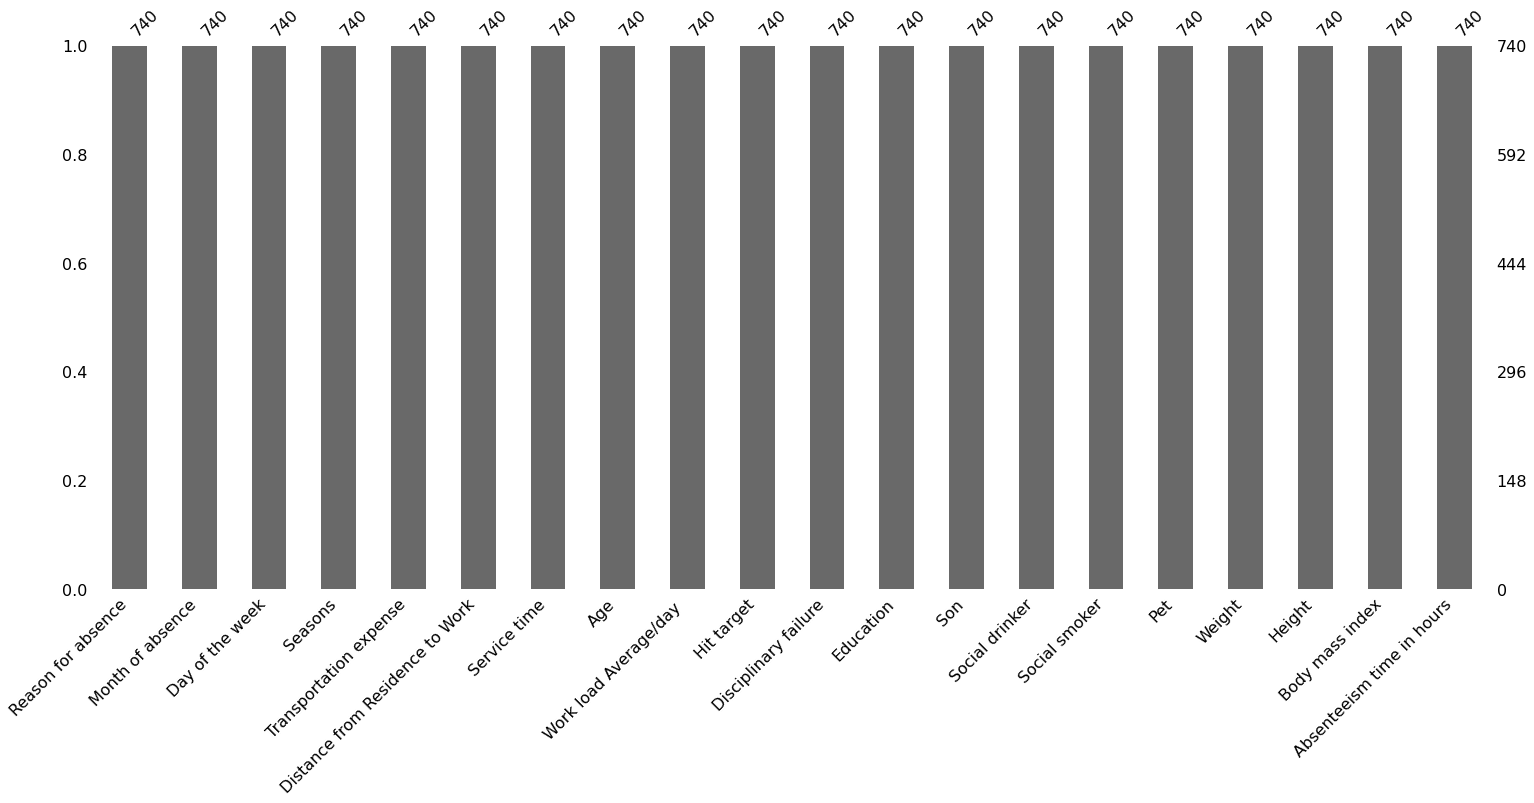

In [ ]:
# Checking for Null values
import missingno as msn
msn.bar(df2.iloc[:,:])

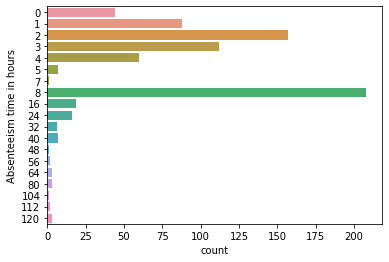

In [ ]:
# Checking for Class balancing
import seaborn as sns
sns.countplot(y=df2.iloc[:,-1],data=df2)

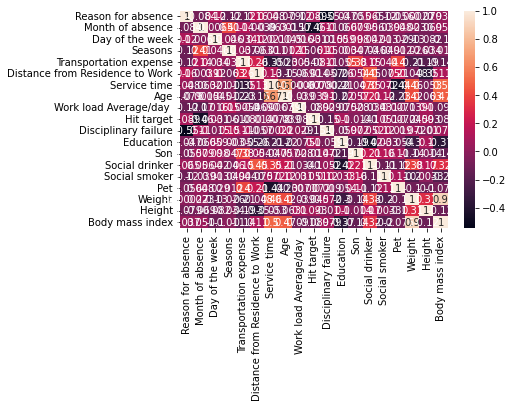

In [ ]:
# Checking correlation between input features
import seaborn as sns
sns.heatmap(df2.iloc[:,:-1].corr(),annot=True)

In [ ]:
# Scaling the input data
from sklearn.preprocessing import StandardScaler
X=df2.iloc[:,:-1]
Y=df2.iloc[:,-1]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)
X.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [ ]:
X=df2.iloc[:,:-1]
Y=df2.iloc[:,-1]
X_scaled = X.to_numpy()
X_scaled=np.insert(X_scaled,0,values=1,axis=1)
print(X_scaled)

[[  1.  26.   7. ...  90. 172.  30.]
 [  1.   0.   7. ...  98. 178.  31.]
 [  1.  23.   7. ...  89. 170.  31.]
 ...
 [  1.   0.   0. ...  98. 170.  34.]
 [  1.   0.   0. ... 100. 170.  35.]
 [  1.   0.   0. ...  77. 175.  25.]]


In [ ]:
# Classifying Absenteeism time in hours as high(2) medium(1) low(0)
output = np.array(Y)

In [ ]:
for i in range(0,740):
    if (output[i]>=9):
        output[i]=3
    elif (output[i]==8):
        output[i]=3
    elif (output[i]>=3):
        output[i]=2
    elif (output[i]>=2):
        output[i]=1
    elif (output[i]>=1):
        output[i]=0
    else:
        output[i]=0

In [ ]:
Y2 = pd.DataFrame(output,columns=['absenteeism in hours'])
Y2.head()

,absenteeism in hours
0,2
1,0
2,1
3,2
4,1


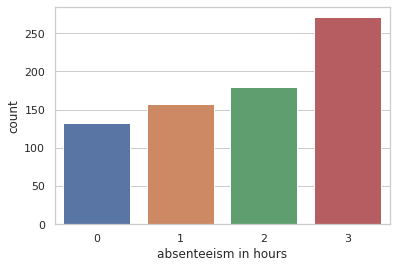

In [ ]:
# Checking for Class balancing
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=Y2["absenteeism in hours"])
#sns.countplot(Y)


# Applying Multiple Logistic Regression with Ridge Regularization

In [ ]:
encoded = pd.get_dummies(Y2, columns = ["absenteeism in hours"])
print(encoded)

     absenteeism in hours_0  absenteeism in hours_1  absenteeism in hours_2  \
0                         0                       0                       1   
1                         1                       0                       0   
2                         0                       1                       0   
3                         0                       0                       1   
4                         0                       1                       0   
..                      ...                     ...                     ...   
735                       0                       0                       0   
736                       0                       0                       1   
737                       1                       0                       0   
738                       1                       0                       0   
739                       1                       0                       0   

     absenteeism in hours_3  
0                    

In [ ]:
encoded.head()

,absenteeism in hours_0,absenteeism in hours_1,absenteeism in hours_2,absenteeism in hours_3
0,0,0,1,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [ ]:
Y_1=encoded.iloc[:,-4]
Y_2=encoded.iloc[:,-3]
Y_3=encoded.iloc[:,-2]
Y_4=encoded.iloc[:,-1]

In [ ]:
# Dividing data into test and train
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_scaled, Y_1, test_size=0.3, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_scaled, Y_2, test_size=0.3, random_state=42)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X_scaled, Y_3, test_size=0.3, random_state=42)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X_scaled, Y_4, test_size=0.3, random_state=42)

In [ ]:
Y_1.head()

0    0
1    1
2    0
3    0
4    0
Name: absenteeism in hours_0, dtype: uint8

In [ ]:
Y_2.head()

0    0
1    0
2    1
3    0
4    1
Name: absenteeism in hours_1, dtype: uint8

In [ ]:
Y_3.head()

0    1
1    0
2    0
3    1
4    0
Name: absenteeism in hours_2, dtype: uint8

In [ ]:
Y_4.head()

0    0
1    0
2    0
3    0
4    0
Name: absenteeism in hours_3, dtype: uint8

In [ ]:
def logistic_regression(n,alpha,X_train,lda,Y_train):
    m,k=X_train.shape
    beta=np.zeros(k)
    for i in range(n):
        cost_gradient=np.zeros(k)
        z=X_train.dot(beta)
        predicted=1/(1+np.exp(-z))
        difference=predicted-Y_train
        for j in range(k):
            cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
        for j in range(k):
            beta[j]=beta[j]*(1-(alpha*lda/m))-(alpha/m)*cost_gradient[j]
    #print(beta)
    return beta

In [ ]:
X1_train_copy = X1_train
X2_train_copy = X2_train
X3_train_copy = X3_train
X4_train_copy = X4_train

In [ ]:
X1_train[1] = X1_train[1] / 100
X1_train[2] = X1_train[2] / 10
X1_train[3] = X1_train[3] / 10
X1_train[4] = X1_train[4] / 10
X1_train[5] = X1_train[5] / 1000
X1_train[6] = X1_train[6] / 100
X1_train[7] = X1_train[7] / 10
X1_train[8] = X1_train[8] / 100
X1_train[9] = X1_train[9] / 1000
X1_train[10] = X1_train[10] / 100
X1_train[12] = X1_train[12] / 10
X1_train[13] = X1_train[13] / 10
X1_train[16] = X1_train[16] / 10
X1_train[17] = X1_train[17] / 100
X1_train[18] = X1_train[18] / 1000
X1_train[19] = X1_train[19] / 100

In [ ]:
X2_train[1] = X2_train[1] / 100
X2_train[2] = X2_train[2] / 10
X2_train[3] = X2_train[3] / 10
X2_train[4] = X2_train[4] / 10
X2_train[5] = X2_train[5] / 1000
X2_train[6] = X2_train[6] / 100
X2_train[7] = X2_train[7] / 10
X2_train[8] = X2_train[8] / 100
X2_train[9] = X2_train[9] / 1000
X2_train[10] = X2_train[10] / 100
X2_train[12] = X2_train[12] / 10
X2_train[13] = X2_train[13] / 10
X2_train[16] = X2_train[16] / 10
X2_train[17] = X2_train[17] / 100
X2_train[18] = X2_train[18] / 1000
X2_train[19] = X2_train[19] / 100

In [ ]:
X3_train[1] = X3_train[1] / 100
X3_train[2] = X3_train[2] / 10
X3_train[3] = X3_train[3] / 10
X3_train[4] = X3_train[4] / 10
X3_train[5] = X3_train[5] / 1000
X3_train[6] = X3_train[6] / 100
X3_train[7] = X3_train[7] / 10
X3_train[8] = X3_train[8] / 100
X3_train[9] = X3_train[9] / 1000
X3_train[10] = X3_train[10] / 100
X3_train[12] = X3_train[12] / 10
X3_train[13] = X3_train[13] / 10
X3_train[16] = X3_train[16] / 10
X3_train[17] = X3_train[17] / 100
X3_train[18] = X3_train[18] / 1000
X3_train[19] = X3_train[19] / 100

In [ ]:
X4_train[1] = X4_train[1] / 100
X4_train[2] = X4_train[2] / 10
X4_train[3] = X4_train[3] / 10
X4_train[4] = X4_train[4] / 10
X4_train[5] = X4_train[5] / 1000
X4_train[6] = X4_train[6] / 100
X4_train[7] = X4_train[7] / 10
X4_train[8] = X4_train[8] / 100
X4_train[9] = X4_train[9] / 1000
X4_train[10] = X4_train[10] / 100
X4_train[12] = X4_train[12] / 10
X4_train[13] = X4_train[13] / 10
X4_train[16] = X4_train[16] / 10
X4_train[17] = X4_train[17] / 100
X4_train[18] = X4_train[18] / 1000
X4_train[19] = X4_train[19] / 100

In [ ]:
beta1 = logistic_regression(10000,0.1,X1_train,0.2,Y1_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [ ]:
beta2 = logistic_regression(5000,0.5,X2_train,0.2,Y2_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [ ]:
max_accuracy = 0
best_beta = beta2
best_n = 0
best_lr = 0
for n_val in range(4000,6000,1000):
    print('Running '+(str)(n_val))
    for lr_val_loop in range(0,500,1):
        lr_val = lr_val_loop / 1000
        if lr_val%50 == 0:
            print('Loop  '+(str)(lr_val))
        test = logistic_regression(n_val,lr_val,X2_train,0.2,Y2_train)
        Y2_predict=1/(1+np.exp(-(X2_test.dot(test))))
        Y2_label=np.zeros(len(Y2_predict))
        for i in range(len(Y2_predict)):
            if(Y2_predict[i]>=0.5):
                Y2_label[i]=1
        TP2=0
        TN2=0
        FP2=0
        FN2=0
        Y2_test=np.array(Y2_test).reshape(-1,1)
        for i in range(len(Y2_label)):
            if(Y2_test[i]==1 and Y2_label[i]==1):
                TP2=TP2+1
            if(Y2_test[i]==1 and Y2_label[i]==0):
                FN2=FN2+1
            if(Y2_test[i]==0 and Y2_label[i]==1):
                FP2=FP2+1
            if(Y2_test[i]==0 and Y2_label[i]==0):
                TN2=TN2+1
        #print(TP2,TN2,FP2,FN2)
        accpos = TP2/(TP2+FP2+1)
        accneg = TN2/(TN2+FN2+1)
        acc = accpos
        if acc>max_accuracy:
            max_accuracy = acc
            best_beta = test
            best_n = n_val
            best_lr = lr_val
            print(max_accuracy)
            print(best_n)
            print(best_lr)
            print()
print(max_accuracy)
print(best_n)
print(best_lr)
print(best_beta)
beta2 = best_beta

Running 4000
Loop  0.0
0.22869955156950672
4000
0.0

0.35714285714285715
4000
0.001



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


0.3779527559055118
4000
0.005



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


0.5
4000
0.019

Running 5000
Loop  0.0
0.5
4000
0.019
[ 0.06081817 17.55053417 -8.91789589  2.42655002 -0.31253456 -1.77405679
 -3.79948735  0.18761155  0.02612692 -1.63345213  7.99198139 -0.08722895
  1.25584359 -2.15158179 -1.40893789 -0.02594098  0.35787784 -6.29623194
 -0.3552972   1.45168485]


In [ ]:
beta3 = logistic_regression(5000,0.1,X3_train_copy,0.2,Y3_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [ ]:
beta4 = logistic_regression(10000,0.001,X4_train,0.2,Y4_train)

# Predicting and Labelling

In [ ]:
Y1_predict=1/(1+np.exp(-(X1_test.dot(beta1))))
Y1_label=np.ones(len(Y1_predict))
for i in range(len(Y1_predict)):
    if(Y1_predict[i]<0.5):
        Y1_label[i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [ ]:
Y2_predict=1/(1+np.exp(-(X2_test.dot(beta2))))
Y2_label=np.zeros(len(Y2_predict))
for i in range(len(Y2_predict)):
    if(Y2_predict[i]>=0.5):
        Y2_label[i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [ ]:
Y3_predict=1/(1+np.exp(-(X3_test.dot(beta3))))
Y3_label=np.zeros(len(Y3_predict))
for i in range(len(Y3_predict)):
    if(Y3_predict[i]>=0.5):
        Y1_label[i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [ ]:
Y4_predict=1/(1+np.exp(-(X4_test.dot(beta4))))
Y4_label=np.zeros(len(Y4_predict))
for i in range(len(Y4_predict)):
    if(Y4_predict[i]>=0.5):
        Y4_label[i]=1

# Performance Evaluation

In [ ]:
TP1=0
TN1=0
FP1=0
FN1=0
Y1_test=np.array(Y1_test).reshape(-1,1)
for i in range(len(Y1_label)):
    if(Y1_test[i]==1 and Y1_label[i]==1):
        TP1=TP1+1
    if(Y1_test[i]==1 and Y1_label[i]==0):
        FN1=FN1+1
    if(Y1_test[i]==0 and Y1_label[i]==1):
        FP1=FP1+1
    if(Y1_test[i]==0 and Y1_label[i]==0):
        TN1=TN1+1

In [ ]:
print(TP1,TN1,FP1,FN1)
print((TP1/(TP1+FP1)))
print((TN1/(TN1+FN1)))

134 69 9 10
0.9370629370629371
0.8734177215189873


In [ ]:
TP2=0
TN2=0
FP2=0
FN2=0
Y2_test=np.array(Y2_test).reshape(-1,1)
for i in range(len(Y2_label)):
    if(Y2_test[i]==1 and Y2_label[i]==1):
        TP2=TP2+1
    if(Y2_test[i]==1 and Y2_label[i]==0):
        FN2=FN2+1
    if(Y2_test[i]==0 and Y2_label[i]==1):
        FP2=FP2+1
    if(Y2_test[i]==0 and Y2_label[i]==0):
        TN2=TN2+1


In [ ]:
print(TP2,TN2,FP2,FN2)
print((TP2/(TP2+FP2)))
print((TN2/(TN2+FN2)))

45 163 8 6
0.8490566037735849
0.9644970414201184


In [ ]:
TP3=0
TN3=0
FP3=0
FN3=0
Y3_test=np.array(Y3_test).reshape(-1,1)
for i in range(len(Y3_label)):
    if(Y3_test[i]==1 and Y3_label[i]==1):
        TP3=TP3+1
    if(Y3_test[i]==1 and Y3_label[i]==0):
        FN3=FN3+1
    if(Y3_test[i]==0 and Y3_label[i]==1):
        FP3=FP3+1
    if(Y3_test[i]==0 and Y3_label[i]==0):
        TN3=TN3+1

In [ ]:
print(TP3,TN3,FP3,FN3)
print((TP3/(TP3+FP3)))
print((TN3/(TN3+FN3)))

50 167 2 5
0.9615384615384616
0.9709302325581395


In [ ]:
TP4=0
TN4=0
FP4=0
FN4=0
Y4_test=np.array(Y4_test).reshape(-1,1)
for i in range(len(Y4_label)):
    if(Y4_test[i]==1 and Y4_label[i]==1):
        TP4=TP4+1
    if(Y4_test[i]==1 and Y4_label[i]==0):
        FN4=FN4+1
    if(Y4_test[i]==0 and Y4_label[i]==1):
        FP4=FP4+1
    if(Y4_test[i]==0 and Y4_label[i]==0):
        TN4=TN4+1

In [ ]:
print(TP4,TN4,FP4,FN4)
print((TP4/(TP4+FP4)))
print((TN4/(TN4+FN4)))

75 142 3 2
0.9615384615384616
0.9861111111111112


In [ ]:
accuracy1=(((TP1)/(TP1+FP1))+((TN1)/(TN1+FN1)))/2
accuracy2=(((TP2)/(TP2+FP2))+((TN2)/(TN2+FN2)))/2
accuracy3=(((TP3)/(TP3+FP3))+((TN3)/(TN3+FN3)))/2
accuracy4=(((TP4)/(TP4+FP4))+((TN4)/(TN4+FN4)))/2
avg_accuracy=(accuracy1+accuracy2+accuracy3+accuracy4)/4

In [ ]:
print('Accuracy for classifying class 1 = ',accuracy1)
print('Accuracy for classifying class 2 = ',accuracy2)
print('Accuracy for classifying class 3 = ',accuracy3)
print('Accuracy for classifying class 4 = ',accuracy4)

Accuracy for classifying class 1 =  0.9052403292909622
Accuracy for classifying class 2 =  0.9067768225968517
Accuracy for classifying class 3 =  0.9662343470483006
Accuracy for classifying class 4 =  0.9738247863247864


In [ ]:
print('Average Accuracy = ',avg_accuracy)

Average Accuracy =  0.9380190713152252
